# <center>Overview
This project analyzes the Ramen Ratings dataset from Kaggle. This dataset has a few thousand ramen products and their ratings, from 0 to 5 stars. The data includes the review number, the ramen's brand, product name, packaging style, country of origin, rating, and whether or not the ramen is in the top 10. I chose to make this a one-vs-rest classification problem on whether a ramen is rated five stars or not. The analysis uses independence tests and feature engineering to arrive at key drivers of five-star ratings, then uses these features to build a predictive model. The project successfully identified key drivers using these methods and build a predictive model that performs better than a standard baseline for the work.

## The cool new stuff I accomplished for this project
- **Heavy keyword engineering**
    * Domain research to understand ramen products based on keyword
    * Translation to group all keywords into consistent categories
    * Categorization on common factors based on domain research and translation
- **Multi-layered statistical testing to eliminate features**
    * Chi-Square tests to eliminate initial features that are not related to target
    * One-hot encoding of remaining features' categories
    * Chi-Square tests to eliminate one-hot-encoded categories that are not related to target
- **Clustering country and keyword features into low-, medium-, and high-rate five-star ratings groups**
    * Checked proportions of five-star rating counts against not-five-star rating counts for True in encoded feature
    * Checked proportions of five-star rating counts against not-five-star rating counts for False in encoded feature
    * Compared five-star proportions to check increase/decrease in proportion from False to True
    * Bracketed increasing, middle, and decreasing proportions from False to True
    
## Other stuff that I've done before
- Wrangle
    * Categorize and encode target into five_stars column (classes: is five-stars, isn't five stars)
    * Fix some values, drop some nulls, outliers, and duplicate rows, get rid of unnecessary columns
    * Create univariate visualizations
- Explore
    * Run Chi-Square testing to determine if feature is related to target
    * Feature engineering (overall)
    * Create bivariate visualizations
    * Choose features for model
- Model
    * Choose optimization priorities for the model (F1 Score)
    * Resample the target to address class imbalance
    * Create baseline model and multiple algorithmic models with varying hyperparameter combinations
    * Evaluate models on Validate (first out-of-sample split)
    * Choose best model in terms of our optimization priority
    * Calculate ROC AUC of baseline and best model
    * Evaluate baseline and best model on Test split
    
## Findings
1. The brand of ramen does not influence whether or not the ramen product has a five-star rating.
1. The packaging of ramen does not influence whether or not the ramen product has a five-star rating.
1. A ramen's country of origin has an influence on whether or not the ramen product has a five-star rating.
    - Malaysia has the highest five-star rating proportion of all origin countries.
    - Ramen originating from Malaysia, Singapore, or Taiwan have the highest proportion of five-star ratings.
    - Ramen from Hong Kong, Japan, South Korea, or Indonesia have the next-highest proportions of five-star ratings.
    - Ramen from China, Thailand, or USA have the lowest proportions of five-star ratings.
    - China has the lowest five-star rating proportion of all origin countries.
1. A ramen's noodle type does not influence whether or not the ramen product has a five-star rating.
1. A ramen's flavor influences whether or not the ramen product has a five-star rating.
    - Curry flavor has the highest proportion of five-star ratings for all flavor categories.
    - Ramen with curry or sesame flavor have the highest proportions of five-star ratings.
    - Ramen with pork flavor or the common crustaceans have the next-highest proportions of five-star ratings.
    - Chicken- and beef- flavored ramen products have the lowest five-star rating proportions of all flavors.
    - Chicken flavor has the lowest five-star rating proportions of all flavors.
1. A ramen's spicy status influences whether or not the ramen product has a five-star rating.
1. A ramen's fried status does not have an effect on whether or not the ramen product has a five-star rating.

## Model Results
- Features used: country and flavor brackets (as described above) and spicy status
- Evaluation Metric: F1 Score
- Best model: Logistic Regression
- Model performance: outperforms the baseline on F1 Score and ROC AUC for unseen data

# <center>Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

import wrangle
import explore
import model

# <center>Wrangle
## Bottom Line Up Front: What I Did for Wrangle
1. Acquire ramen-ratings.csv from Kaggle
1. Rename a United States value to USA
1. Drop low-count ramen styles Box, Can, and Bar (8 rows)
1. Drop countries with less than 5 cumulative observations (29 rows)
1. Drop Unrated, nulls and duplicates (16 rows)
1. Replace Stars column with five_stars column
1. Drop 'Review #' and 'Top Ten' columns
1. Rename columns for easier exploration
1. Split cleaned data into Train, Validate, and Test splits for exploration and modeling

In [2]:
# wrangle.py script to wrangle the data as described above
train, _, _ = wrangle.prep_explore()

train.head(3)

Train size: (1515, 5) Validate size: (506, 5) Test size: (506, 5)


,brand,name,package,country,five_stars
2566,Samyang,Hot,Pack,South Korea,False
332,Nongshim,Shin Noodle Soup,Cup,USA,True
1363,Doll,Hello Kitty Dim Sum Noodle Japanese Curry Flavour,Cup,Hong Kong,False


# <center>Explore
## Bottom Line Up Front: What I Did for Explore
- Statistical testing on Ramen Brands that found brand is independent of five-star outcomes
- Statistical testing on Ramen Packaging that found packaging is independent of five-star outcomes
- Statistical testing on Country of Origin that found country is related to five-star outcomes
- Keyword engineering to categorize ramen products into noodle type, flavor, spicy status, and fried status categories
- Statistical testing on new features that found noodle type and fried status have no impact on five-star outcomes
- Statistical testing on new features that found ramen flavor and spicy status have an impact on five-star outcomes
- Dropped specific countries and flavors that did not have at least 5 reviews with five-star rating
- Analyzed proportions of five-star reviews to all reviews for each country and flavor category
- Grouped into high-, medium-, and low-proportion brackets for country and for flavor category
- Checked country and flavor category brackets along with spicy status in terms of five-star and non-five-star reviews
- Chose these features for modeling

## Ramen Brand is Independent
- $H_0$: Ramen brand and five-star ratings are independent.
- $H_a$: Ramen brand and five-star ratings have a dependent relationship.

Confidence interval: 95%

In [3]:
# run chi-square test on ramen brand
explore.chi2_ramen_brand(train)

Ramen brand and five-star ratings are independent, did not pass 95% confidence interval.
p-value: 0.223


## Ramen Packaging is Independent

- $H_0$: Packaging and five-star ratings are independent.
- $H_a$: Packaging and five-star ratings have a dependent relationship.

Confidence interval: 95%

In [4]:
# run chi-square test on ramen packaging
explore.chi2_ramen_packaging(train)

Packaging and five-star ratings are independent, did not pass 95% confidence interval.
p-value: 0.439


## Ramen Country of Origin is Related

- $H_0$: Country of origin and five-star ratings are independent.
- $H_a$: Country of origin and five-star ratings have a dependent relationship.

Confidence interval: 95%

In [5]:
# run chi-square test on ramen country of origin
explore.chi2_ramen_origin_country(train)

Country of origin and five-star ratings have a dependent relationship with 95% confidence.
p-value: 0.0


## Breaking Down the Ramen Product Name
### Why We Needed to Engineer Features for Product Name
Nearly all ramen reviews in our dataset have a unique combination of brand and product name. Only 21 combinations of brand and product out of the nearly 1500 in our exploration split have two reviews, and there are no combinations with more than two reviews. Because of this low commonality, we couldn't run initial chi-square tests to see if product names have a dependent relationship with five star reviews.

In [6]:
# show the review repeats and non-repeats
print("Brand+name with only one review:", (train[['brand','name']].value_counts() == 1).sum())
print("Brand+name with two reviews:", (train[['brand','name']].value_counts() == 2).sum())
print("Brand+name with more than two reviews:", (train[['brand','name']].value_counts() > 2).sum())

Brand+name with only one review: 1473
Brand+name with two reviews: 21
Brand+name with more than two reviews: 0


### Identifying Keywords
I've designated certain keywords that I will use to categorize product names. Although that raw list is contained in the explore.py script, the analysis in this notebook will break it down into an organized format.

Based on the designated keywords, I ran the following two cells to check remaining values that I missed earlier. If I found a notable word, I added it to the above keyword list and re-ran the cells. I repeated this process until I was satisfied with the words I had designated as keywords.

In [7]:
# create has_keyword column, check value counts
explore.create_has_keyword(train).has_keyword.value_counts()

True     1377
False     138
Name: has_keyword, dtype: int64

In [8]:
# check top-10 words
explore.check_non_keywords(train)

Noodles    34
Noodle     30
Ramen      19
Instant    16
Cup        14
Flavour    11
Sauce      11
Flavor     10
Rasa        9
Mi          8
dtype: int64


### Categorization Using Domain Research and Translation
During and after creating this keyword list, I conducted background research and translation on keywords for the purposes of categorization. **This process took the most time of any step in this project.** 

I built the categories from scratch and researched whether a word indicated the product belonged to the category or not. After many iterations of this category creation and attribution, I came up with four features, which will be shown later. An early result of this process is contained here as an example.

**Taste**
* 'Spicy', 'Spice', 'Shin', 'Jjamppong'/'Jjambbong'(seafood), 'Buldalk'(chicken), 'Sutah'(beef), 'Budae'(sausage), 'Habanero', 'Jinjja', 'Jin', 'Yeul', 'Mala', 'Teumsae', 'Bibim', 'Picante', 'Bulnak', 'Volcano', 'Odongtong', 'Sriracha', 'Arrabiata', 'Tom Yum', 'Tom Yam', 'Tom Saab', 'Tom Klong', 'Suki', 'Laksa' (304)
* 'Ramyonsari', 'Keopnurungji' (2)
* 'Salt', 'Shio', 'Sio' (17)
* 'Soy', 'Shoyu', 'Shouyu', 'Teriyaki' (70)
* 'Mayo' (6)
* 'Cheese' (11)
* 'Sweet' (18)
* 'Sour', 'sour' (19)
* 'Curry' (68)
* 'Sesame' (32)
* 'Pickle' (11)
* 'Masala' (9)

As you can see, I grouped keywords loosely here and checked how many products contained at least one of the keywords in each bulletpoint. The code to check that number is shown below as an example.

In [9]:
# checking row count having the above noodle types (ran this cell multiple times with different inputs)
train.name.str.contains("|".join(['Soy', 'Shoyu', 'Shouyu', 'Teriyaki'])).sum()

70

### Choosing Candidate Features
After creating these rough categories and checking row counts, we were able to begin considering what features we should use in our analysis. 
#### Requirements
1. A feature must have at least two unique values 
    * EX: A 'meat_type' feature must have at least two categories, like 'chicken', 'beef', 'pork', etc
1. Each unique value in the feature must have a count of at least 10
    * Assumption of chi-square test: each crosstab cell must have at least a value of 5
    * Anything less than 10, when split for the crosstab, will not meet this chi-square assumption
    * EX: 'chicken' should have at least a count of 10
1. The feature's values should be independent from one another 
    * EX: 'taste_type' should not have individual 'sweet' and 'sour' values because some ramen have 'sweet & sour' in the product name
    
#### Features that Pass the Above Requirements
- noodle_type: 
    * **wheat** ('Udon', 'Udoin', 'U-Dong', 'U-dong', 'Sano', 'Spaghetti', 'Carbonara', 'Neapolitan', 'Napolitan', 'Kalguksoo') (63)
    * **buckwheat** ('Buckwheat', 'Soba') (18)
    * **rice** ('Rice', 'Vermicelli', 'Vernicalli', 'Bihun', 'Biryani', 'Tteokbokki', 'Tteobokki', 'Topokki', 'Rabokki') (109)
- flavor: 
    * **miso** ('Miso') (23)
    * **chicken** ('Chicken', 'Chikin', 'Duck', 'Pollo', 'Buldalk', 'Buldak', 'Requeijao', 'Gallina') (215)
    * **beef** ('Beef', 'Gomtang', 'Seolleongtang', 'Sukiyaki', 'Nam Tok', 'Sutah', 'Sogokimyun', 'Cuchareable', 'Carne', 'Kebab', 'Gentong', 'Bulalo', 'Yukgaejang') (163)
    * **pork** ('Pork', 'Prok', 'Jjajangmyeon', 'Jjajangmen', 'Jiajang', 'Jjajang', 'Chacharoni', 'Jjawang', 'Tonkotsu', 'Tomkotsu', 'Bacon', 'Ossyoi', 'Yakibuta', 'Batchoy') (115)
    * **crustacean** ('Crab', 'Lobster', 'Shrimp', 'Prawn') (108)
    * **mollusk** ('Bajirak', 'Clam', 'Abalone', 'Scallop', 'Vongole') (15)
    * **chili** ('Chili', 'Chilli', 'chili', 'Cabe') (37)
    * **curry** ('Curry', 'curry', 'Betawi', 'Perisa', 'Kari') (93)
    * **chow_mein** ('Chow Mein') (25)
    * **kimchi** ('Kimchi', 'Kimchee', 'Sabalmyeon', 'Kim Chee') (24)
    * **mushroom** ('Mushroom', 'Shiitake', 'Shitake') (35)
    * **tomato** ('Tomato') (21)
    * **veggie** ('Clear', 'Veg', 'Oosterse') (86)
    * **sesame** ('Sesame', 'Sesami') (33)
    * **lime** ('Lime', 'Jeruk Nipis', 'Kalamansi') (11)
- spicy:
    * **True** ('Spicy', 'Spice', 'Shin', 'Jjamppong'/'Jjambbong'/'Jjampong'/'Champong'(seafood), 'Buldalk'/'Buldak'(chicken), 'Sutah'(beef), 'Budae'(sausage), 'RMy', 'Habanero', 'Jinjja', 'Jin', 'Yeul', 'Mala', 'Teumsae', 'Bibim', 'Picante', 'Bulnak', 'Volcano', 'Odongtong', 'Sriracha', 'Arrabiata', 'Tom Yum', 'Tom Yam', 'tom Yum', 'Tom Saab', 'Tom Klong', 'Suki', 'Laksa', 'Chah Chiang', 'Namja', 'Befikr', 'Mi Goreng', 'Kocek', 'Jalapeno', 'Pad Kee Mao', 'Kokomen', 'Wasabi', 'Kung Pao', 'Kimchi', 'Kimchee', 'Sabalmyeon', 'Kim Chee', 'Nam Tok', 'Sogokimyun', 'Gentong', 'Chili', 'Chilli', 'chili', 'Cabe', 'Yukgaejang', 'Yakisoba', 'Yaki-Soba', 'Yakiosoba') (446)
    * **False** ('Miso', 'Requeijao', 'Seolleongtang', 'Sukiyaki', 'Jjajangmyeon', 'Jjajangmen', 'Jiajang', 'Jjajang', 'Chacharoni', 'Jjawang', 'Ossyoi', 'Batchoy', 'Bajirak', 'Mushroom', 'Shiitake', 'Shitake', 'Tomato', 'Clear') (99)
- fried:
    * **True** ('Stir Fry', 'Stir-Fried', ' Fried', 'Bokkeum', 'Tteokbokki', 'Tteobokki', 'Topokki', 'Yukgaejang', 'Rabokki', 'Yakisoba', 'Yaki-Soba', 'Yakiosoba', 'Goreng', 'Tempura', 'Kung Pao', 'Sukiyaki', 'Kebab', 'Gentong', 'Bulalo', 'Jjajangmyeon', 'Jjajangmen', 'Jiajang', 'Jjajang', 'Chacharoni', 'Jjawang', 'Tonkotsu', 'Tomkotsu', 'Bacon', 'Yakibuta', 'Batchoy', 'Chow Mein') (198)
    * **False** ('Non-Fried', 'Requeijao', 'Yakisoba', 'Yaki-Soba', 'Yakiosoba', 'Gomtang', 'Seolleongtang', 'Nam Tok', 'Sutah', 'Sogokimyun', 'Cuchareable', 'Gomtang', 'Yukgaejang', 'Ossyoi', 'Clear') (52)
    
### Creating the Features, Testing for Relationship to Target
After background research and translation, after several rounds of categorization, after restricting categories for testing, and after choosing features that will maintain independence between categories, we finally have something to work with. 

Now, we will create each feature as described above, then test each feature to see if they have a relationship with our target, five_stars.

#### noodle_type

In [10]:
# create noodle_type feature
train = explore.create_noodle_type(train)
# test noodle_type for independence
explore.chi2_ramen_noodle_type(train)

Noodle type and five-star ratings are independent, did not pass 95% confidence interval.
p-value: 0.725


#### flavor

In [11]:
# create flavor feature
train = explore.create_flavor(train)
# test flavor for independence
explore.chi2_ramen_flavor(train)

Flavor and five-star ratings have a dependent relationship with 95% confidence.
p-value: 0.0


#### spicy

In [12]:
# create spicy feature
train = explore.create_spicy(train)
# test spicy for independence
explore.chi2_ramen_spicy_status(train)

Spicy status and five-star ratings have a dependent relationship with 95% confidence.
p-value: 0.014


#### fried

In [13]:
# create fried feature
train = explore.create_fried(train)
# test fried for independence
explore.chi2_ramen_fried_status(train)

Fried status and five-star ratings are independent, did not pass 95% confidence interval.
p-value: 0.282


### Results of Breaking Down Product Name
**Through feature engineering and statistical testing, the features 'flavor' and 'spicy' will join 'country' in our univariate and bivariate analysis.**

In [14]:
# limit dataframe to the candidate features
train = train[['five_stars','country','flavor','spicy']]
train['five_stars'] = train['five_stars'].astype('str')

# Univatiate Look at Our Candidate Features
Let's look at histograms for each feature and the target.

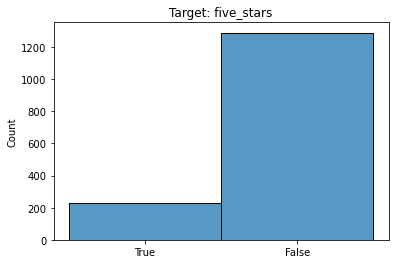

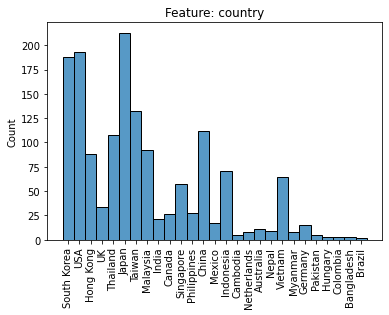

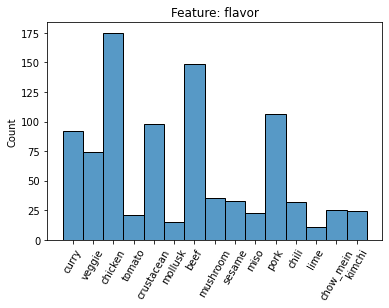

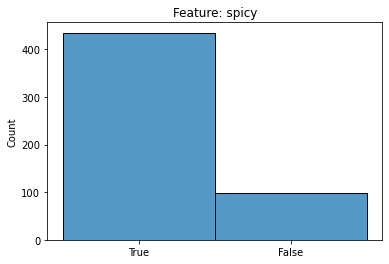

In [15]:
# initial univariate histograms
sns.histplot(train.five_stars.sort_values(ascending=False)) # five_stars
plt.title('Target: five_stars')
plt.xlabel('')
plt.show()

sns.histplot(train.country) # country
plt.title('Feature: country')
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

sns.histplot(train.flavor.dropna()) # flavor
plt.title('Feature: flavor')
plt.xticks(rotation=60)
plt.xlabel('')
plt.show()

sns.histplot(train.spicy.dropna().sort_values(ascending=False)) # spicy
plt.title('Feature: spicy')
plt.xlabel('')
plt.show()

The features 'country' and 'flavor' have multiple categories. We will need to split these categories out for modeling.

# Each Country and Flavor Into Brackets

## Country
### Check Total Reviews and Number of Five-Star Reviews

In [16]:
# check counts

### Bracket Countries Based on Proportion of Five-Star Reviews

In [17]:
# bracket countries into high-, medium-, and low-proportion five star review brackets

## Flavor
### Check Total Reviews and Number of Five-Star Reviews

In [18]:
# check counts

### Bracket Flavors Based on Proportion of Five-Star Reviews

In [19]:
# bracket countries into high-, medium-, and low-proportion five star review brackets

## Final Features: Bivariate Look in Terms of Target

In [20]:
# visualize target/non-target charts for each feature here
# include exact numbers and proportions

## Results of Exploration
- Features kept for modeling:

# <center>Model
## Bottom Line Up Front: What I Did for Model
- Prepared entire dataset with model features
- Chose F1 Score as our main evaluation metric due to prioritizing accuracy in presence of imbalanced classes
- Split dataset into Train, Validate, and Test
- Applied SMOTE+Tomek resampling to fix the class imbalance in our target for the Train split
- Built, fit several classification models and hyperparameter combinations on resampled Train split
- Evaluated baseline and all model performances on Validate, chose best model (Logistic Regression)
- Chose not to use Grid Search to optimize hyperparameters due to nature of Logistic Regression hyperparameters
- Evaluated baseline and best model's ROC Curve AUC
- Evaluated baseline and best model on sequestered Test split

# Conclusion
Using nothing more than analyzing ramen product names, I was able to build several categorical features that took into account domain knowledge and translation. Some of these keyword-engineering features were statistically related to our target and used in the model. In the end, our predictive model outperformed the baseline on common evaluation metrics.